In [1]:
from model.modelorchastrator import ModelOrchestrator
import pandas as pd
from data_pipeline.dataset import Dataset

from hydra.utils import instantiate
from hydra import compose, initialize
from hydra.core.global_hydra import GlobalHydra
from data_pipeline.pipelinesteps import data_splitter

(CVXPY) Feb 20 09:03:26 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 20 09:03:26 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [2]:
df = pd.read_feather("../../data/parquet_files/train/processed_train.feather")
df.head()

,case_id,target,numberofcontrsvalue_358L_max,nominalrate_281L_min,classificationofcontr_400M_mode,totaldebtoverduevalue_178A_max,collater_valueofguarantee_876L_mean,pmts_overdue_1140A_max,credacc_cards_status_52L_mode,credacc_cards_status_52L_last,last180dayaveragebalance_704A_last,last180dayaveragebalance_704A_mean,last180dayaveragebalance_704A_max
0,0,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
1,1,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
2,2,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
3,3,0,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN
4,4,1,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN


In [3]:

GlobalHydra.instance().clear()
initialize(config_path="../../", version_base=None)
cfg = compose(config_name="config")

data_pipeline = instantiate(cfg.data_pipeline)
df = pd.read_feather("../../data/parquet_files/train/processed_train.feather")
df = data_pipeline.apply(df)

dataset = Dataset(data=df, data_splitter=data_splitter, target_column='target')

In [4]:
model_orchestrator = ModelOrchestrator(cfg.model)

In [5]:
pipeline = model_orchestrator.modelpipeline

In [6]:
dataset.X_train.head()

,index,case_id,numberofcontrsvalue_358L_max,nominalrate_281L_min,classificationofcontr_400M_mode,totaldebtoverduevalue_178A_max,collater_valueofguarantee_876L_mean,pmts_overdue_1140A_max,credacc_cards_status_52L_mode,credacc_cards_status_52L_last,last180dayaveragebalance_704A_last,last180dayaveragebalance_704A_mean,last180dayaveragebalance_704A_max
221249,221249,605782,NaN,NaN,None,NaN,NaN,0.000,None,None,NaN,NaN,NaN
1220007,1220007,1814036,8.0,NaN,ea6782cc,0.0,0.0,3254.518,None,None,NaN,NaN,NaN
1168023,1168023,1762052,12.0,39.0,ea6782cc,0.0,1250.0,0.000,ACTIVE,None,NaN,NaN,NaN
145230,145230,190664,4.0,42.0,ea6782cc,0.0,0.0,0.000,None,None,NaN,NaN,NaN
338605,338605,723138,NaN,NaN,None,NaN,NaN,NaN,None,None,NaN,NaN,NaN


In [7]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = dataset.X_train, dataset.X_test, dataset.y_train, dataset.y_test 
pipeline.fit(dataset.X_train, dataset.y_train)  

c:\Users\bartw\anaconda3\envs\credit_score\Lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


Binning 0.097 GB of training data: 0.345 s
Binning 0.011 GB of validation data: 0.012 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69306, val loss: 0.69306, in 0.147s
[2/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69296, val loss: 0.69297, in 0.141s
[3/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69287, val loss: 0.69288, in 0.148s
[4/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69278, val loss: 0.69279, in 0.152s
[5/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69269, val loss: 0.69270, in 0.146s
[6/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69260, val loss: 0.69261, in 0.134s
[7/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69251, val loss: 0.69252, in 0.145s
[8/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69242, val loss: 0.69243, in 0.141s
[9/100] 1 tree, 31 leaves, max depth = 9, train loss: 0.69233, val loss: 0.69234, in 0.139s
[10/100] 1 tree, 31 leaves, max depth = 9, train lo

In [8]:
from sklearn.metrics import roc_auc_score

# Predict the probabilities of the positive class
y_pred_proba = pipeline.predict_proba(X_test).T[1]

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC score: {auc_score}")

c:\Users\bartw\anaconda3\envs\credit_score\Lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


AUC score: 0.6748951227699048


<Axes: >

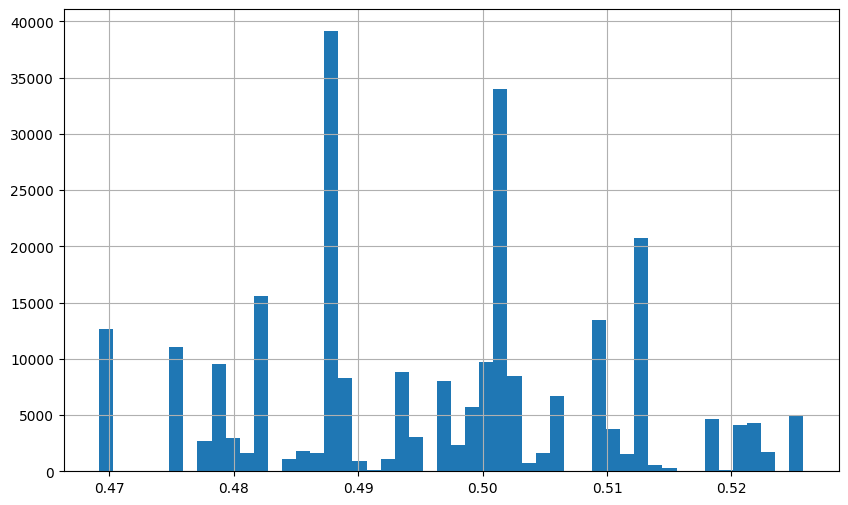

In [20]:
pd.Series(y_pred_proba).hist(bins=50, figsize=(10, 6))

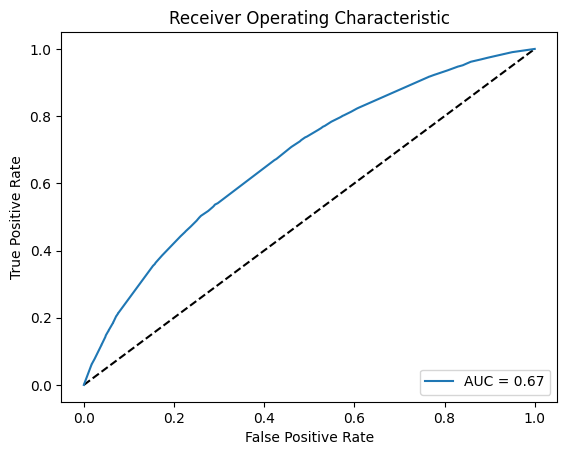

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [10]:
test_data = pd.read_feather("../../data/parquet_files/test/processed_test.feather")
test_data.head()


,case_id,numberofcontrsvalue_358L_max,nominalrate_281L_min,classificationofcontr_400M_mode,totaldebtoverduevalue_178A_max,collater_valueofguarantee_876L_mean,pmts_overdue_1140A_max,credacc_cards_status_52L_mode,credacc_cards_status_52L_last,last180dayaveragebalance_704A_last,last180dayaveragebalance_704A_mean,last180dayaveragebalance_704A_max
0,57543,NaN,NaN,None,NaN,NaN,107427.52,None,NaN,NaN,NaN,NaN
1,57549,1.0,NaN,ea6782cc,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
2,57551,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
3,57552,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
4,57569,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN


In [11]:

test_data = pd.read_feather("../../data/parquet_files/test/processed_test.feather")
test_data = data_pipeline.apply(test_data)
test_data['target'] = 0
test_dataset = Dataset(data=test_data, data_splitter=data_splitter, target_column='target')


In [12]:
pipeline.predict_proba(test_dataset.X.reset_index())

c:\Users\bartw\anaconda3\envs\credit_score\Lib\site-packages\optbinning\binning\transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


array([[0.47913941, 0.52086059],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667],
       [0.49909333, 0.50090667]])